In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [6]:
modo_1 = pd.read_csv("/content/drive/MyDrive/prediccion_productos_agro/Fase 5 (Datos Atlantico)/otras regiones/Modos/descomposicion_barranquillita/Modo_1.csv")
modo_2 = pd.read_csv("/content/drive/MyDrive/prediccion_productos_agro/Fase 5 (Datos Atlantico)/otras regiones/Modos/descomposicion_barranquillita/Modo_2.csv")
residuo = pd.read_csv("/content/drive/MyDrive/prediccion_productos_agro/Fase 5 (Datos Atlantico)/otras regiones/Modos/descomposicion_barranquillita/Residuo.csv")
modos = [modo_1,modo_2,residuo]

for i in modos:
  i["FECHA"] = pd.to_datetime(i["FECHA"],format='%Y-%m-%d')
  i.set_index("FECHA", inplace=True)

<Axes: xlabel='FECHA'>

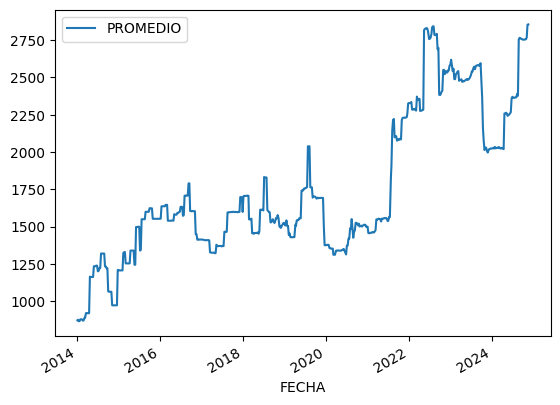

In [8]:
datos_originales = modo_1 + modo_2 + residuo
datos_originales.plot()

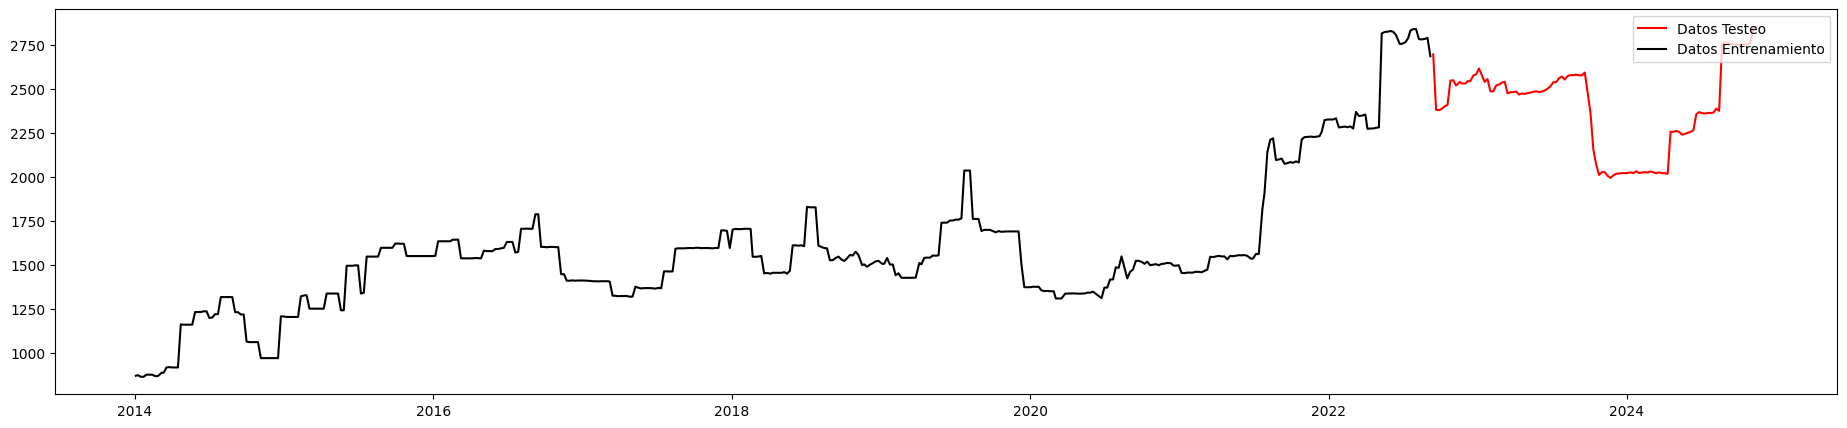

In [10]:
total_datos=len(datos_originales.PROMEDIO)
porcentaje_entrenamiento, porcentaje_validacion = 0.8,0.1
division_entrenamiento = int(total_datos*porcentaje_entrenamiento)

datos_entrenamiento = datos_originales[:division_entrenamiento]
datos_testeo_originales = datos_originales[division_entrenamiento:total_datos]


fig, ax = plt.subplots(figsize=(23, 5))
ax.plot(datos_testeo_originales.index,datos_testeo_originales.PROMEDIO,color='red',label = 'Datos Testeo')
ax.plot(datos_entrenamiento.index,datos_entrenamiento.PROMEDIO,color='black',label = 'Datos Entrenamiento')
ax.legend(loc = 'upper right')
plt.show()

In [11]:
testeo_xgboost = pd.read_csv("/content/drive/MyDrive/prediccion_productos_agro/Fase 5 (Datos Atlantico)/otras regiones/Modelado/Barranquillita/Resultados/testeo_XGboost.csv")

testeo_LGBM = pd.read_csv("/content/drive/MyDrive/prediccion_productos_agro/Fase 5 (Datos Atlantico)/otras regiones/Modelado/Barranquillita/Resultados/testeo_LGBM.csv")


In [12]:
testeo_final = (0.53879814*testeo_xgboost.PROMEDIO +
                0.46120186*testeo_LGBM.PROMEDIO)

In [14]:
ecm_testeo = mean_squared_error( testeo_final,datos_testeo_originales.PROMEDIO[:-3])
recm_testeo = np.sqrt(mean_squared_error( testeo_final,datos_testeo_originales.PROMEDIO[:-3]))
eam_testeo = mean_absolute_error(testeo_final,datos_testeo_originales.PROMEDIO[:-3])
EPAM_testeo = mean_absolute_percentage_error( testeo_final,datos_testeo_originales.PROMEDIO[:-3])

#Imprimir las metricas de testeo del modelo
print ( f'El error cuadratico medio del modelo es: {round(ecm_testeo,2)} ' )
print ( f'La raiz del error cuadratico medio del modelo es: {round(recm_testeo,2)} ' )
print ( f'el error absoluto medio del modelo es: {round(eam_testeo,2)} ' )
print(f"Error porcentual absoluto medio del modelo es: {round(EPAM_testeo,4)} o {round(EPAM_testeo * 100 , 2)} %")

El error cuadratico medio del modelo es: 16426.06 
La raiz del error cuadratico medio del modelo es: 128.16 
el error absoluto medio del modelo es: 107.16 
Error porcentual absoluto medio del modelo es: 0.0421 o 4.21 %


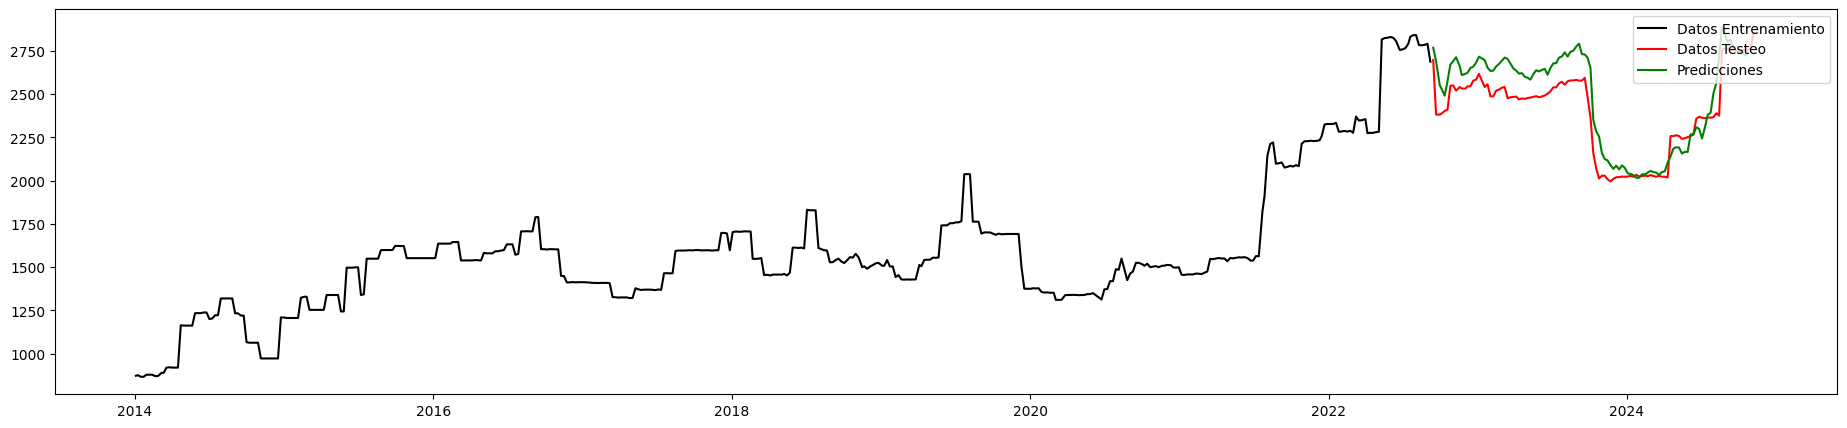

In [15]:

fig, ax = plt.subplots(figsize=(23, 5))
ax.plot(datos_entrenamiento.index,datos_entrenamiento.PROMEDIO,color='black',label = 'Datos Entrenamiento')
ax.plot(datos_testeo_originales.index,datos_testeo_originales.PROMEDIO,color='red',label = 'Datos Testeo')
ax.plot(datos_testeo_originales[:-3].index,testeo_final,color='Green',label = 'Predicciones')
ax.legend(loc = 'upper right')
plt.show()

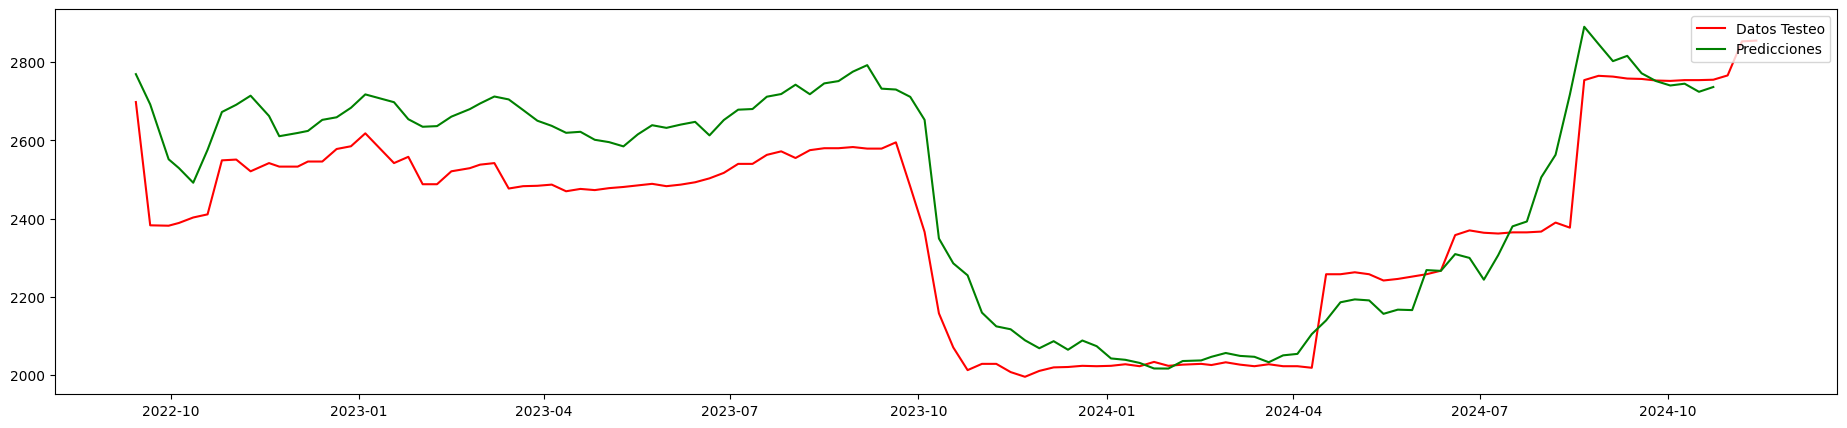

In [16]:
fig, ax = plt.subplots(figsize=(23, 5))
ax.plot(datos_testeo_originales.index,datos_testeo_originales.PROMEDIO,color='red',label = 'Datos Testeo')
ax.plot(datos_testeo_originales.index[:-3],testeo_final,color='Green',label = 'Predicciones')
ax.legend(loc = 'upper right')
plt.show()